# Percolation cluster stats

In [1]:
%matplotlib widget

from os import path
import pickle
import numpy as np
from numba import njit
from qcnico.plt_utils import histogram
import matplotlib.pyplot as plt


#@njit
def get_dcrits(run_inds,temps,datadir):
    nsamples = len(run_inds)
    ntemps = len(temps)
    dcrits = np.zeros((nsamples,ntemps))
    for k in range(nsamples):
        for l in range(ntemps):
            sampdir = f"sample-{run_inds[k]}"
            pkl = f"out_percolate-{temps[l]}K.pkl"
            fo = open(path.join(datadir,sampdir,pkl),'rb')
            dat = pickle.load(fo)
            dcrits[k,l] = dat[1]
            fo.close()

    return dcrits

datadir=path.expanduser("~/Desktop/simulation_outputs/percolation/40x40/percolate_output")
fgood_runs = path.join(datadir, 'good_runs.txt')
with open(fgood_runs) as fo:
    lines = fo.readlines()

#gr_inds = list(map(int,[line.rstrip().lstrip().split('-')[1] for line in lines]))
gr_inds = list(map(int,[line.rstrip().lstrip() for line in lines]))

# temps = np.arange(0,1050,50)
# temps[0] = 10
temps = np.arange(40,440,10)

dcrits = get_dcrits(gr_inds,temps, datadir)
print(dcrits.shape)

davg_T = np.mean(dcrits,axis=0)
dstd_T = np.std(dcrits,axis=0)
print(davg_T.shape)




(174, 40)
(40,)


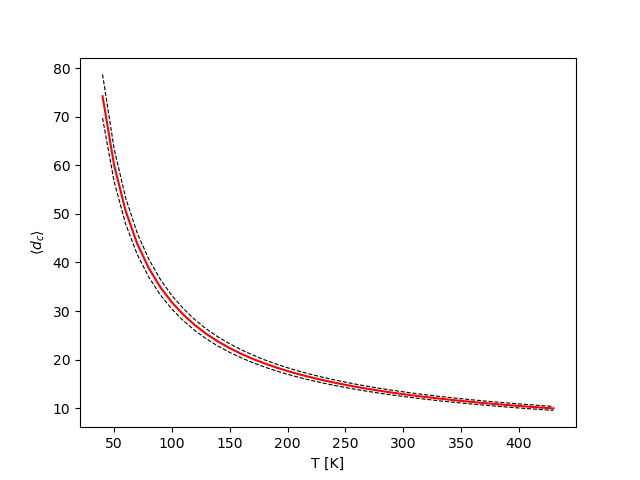

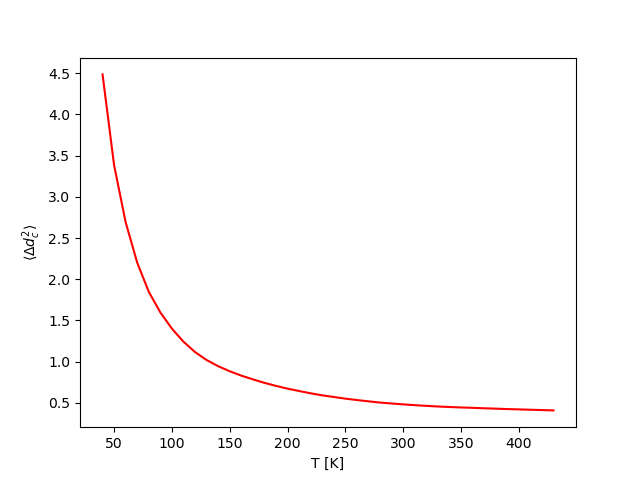

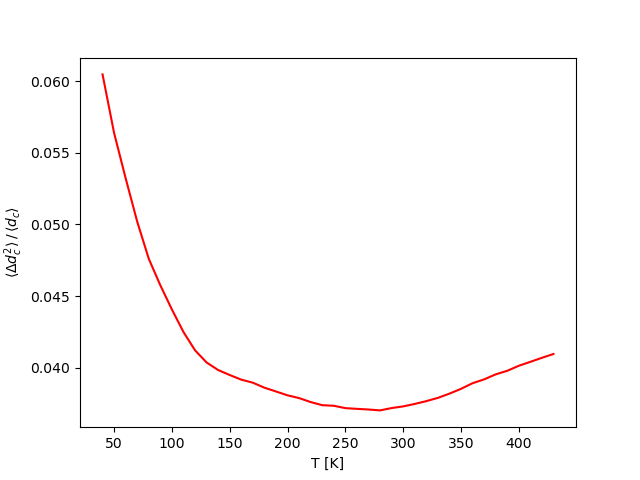

[4.48631316 3.38346307 2.69076299 2.20039344 1.84769039 1.59701927
 1.40026387 1.24166382 1.11608224 1.01972596 0.94463264 0.88334732
 0.83004782 0.7851191  0.74246432 0.70567903 0.67231027 0.6433427
 0.61551449 0.59097274 0.57115842 0.55097498 0.5338511  0.51806268
 0.50307549 0.49205656 0.48123321 0.47175316 0.46324231 0.45557958
 0.44923272 0.4437751  0.43932256 0.43377057 0.42943829 0.42432706
 0.42053083 0.41616086 0.41212092 0.40811937]


In [2]:
fig, ax = plt.subplots()
ax.plot(temps,davg_T,'r-')
ax.plot(temps,davg_T+dstd_T,'k--',lw=0.8)
ax.plot(temps,davg_T-dstd_T,'k--',lw=0.8)
ax.set_xlabel('T [K]')
ax.set_ylabel('$\langle d_{c}\\rangle$')
plt.show()

fig, ax = plt.subplots()
ax.plot(temps,dstd_T,'r-')
ax.set_xlabel('T [K]')
ax.set_ylabel('$\langle \Delta d_c^2\\rangle$')
plt.show()

fig, ax = plt.subplots()
ax.plot(temps,dstd_T/davg_T,'r-')
ax.set_xlabel('T [K]')
ax.set_ylabel('$\langle \Delta d_c^2\\rangle\,/\,\langle d_{c}\\rangle$')
plt.show()


print(dstd_T)

[ 5 10 15 20 25 30 35 39]
[plt_utils.histogram] dx = 0.36109214830109365
[plt_utils.histogram] dx = 0.21392103272901353
[plt_utils.histogram] dx = 0.16686928412562652
[plt_utils.histogram] dx = 0.14101573098837045
[plt_utils.histogram] dx = 0.12488927057911532
[plt_utils.histogram] dx = 0.11084906753947159
[plt_utils.histogram] dx = 0.10874390518489306
[plt_utils.histogram] dx = 0.10477767113870101


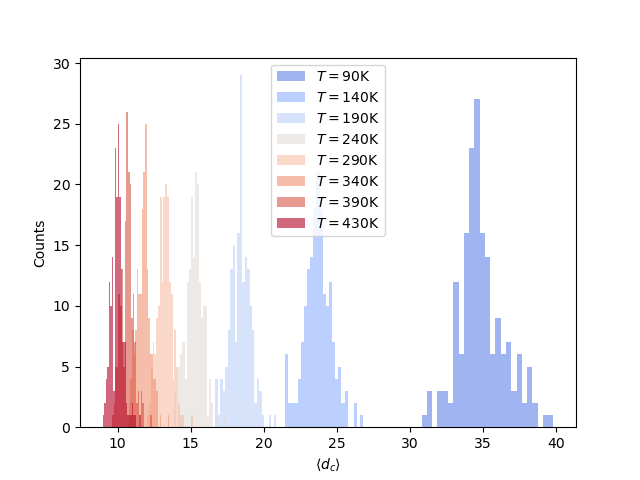

In [20]:
from qcnico import plt_utils

Tcm = plt_utils.get_cm(temps,'coolwarm',max_val=1.0)

fig, ax = plt.subplots()

plot_inds = np.arange(5,45,5)
plot_inds[-1] = 39
print(plot_inds)


for n in plot_inds:
    plt_utils.histogram(dcrits[:,n],nbins=25,show=False, normalised=False, plt_objs=(fig,ax),
        plt_kwargs={'alpha': 0.6, 'color': Tcm[n], 'label': f'$T = {temps[n]}$K'})
ax.set_xlabel('$\langle d_{c}\\rangle$')
plt.legend()
plt.show()

In [4]:
def get_sigma(dcrits,nbins=30):
    hist, bin_edges = np.histogram(dcrits,bins=nbins,density=True)
    bin_inds = np.sum(dcrits[:,None] > bin_edges,axis=1) - 1
    f = hist[bin_inds] * np.exp(-dcrits)
    return np.max(f)

sigmas = np.array([get_sigma(d) for d in dcrits.T])
print(sigmas.shape)
dat = np.vstack((temps, sigmas))
print(dat)
np.save("sigma_v_T.npy",dat)

(40,)
[[4.00000000e+01 5.00000000e+01 6.00000000e+01 7.00000000e+01
  8.00000000e+01 9.00000000e+01 1.00000000e+02 1.10000000e+02
  1.20000000e+02 1.30000000e+02 1.40000000e+02 1.50000000e+02
  1.60000000e+02 1.70000000e+02 1.80000000e+02 1.90000000e+02
  2.00000000e+02 2.10000000e+02 2.20000000e+02 2.30000000e+02
  2.40000000e+02 2.50000000e+02 2.60000000e+02 2.70000000e+02
  2.80000000e+02 2.90000000e+02 3.00000000e+02 3.10000000e+02
  3.20000000e+02 3.30000000e+02 3.40000000e+02 3.50000000e+02
  3.60000000e+02 3.70000000e+02 3.80000000e+02 3.90000000e+02
  4.00000000e+02 4.10000000e+02 4.20000000e+02 4.30000000e+02]
 [5.53575495e-31 1.98021148e-25 6.53634639e-22 2.70893343e-19
  2.68909781e-17 1.64334708e-15 2.59292597e-14 2.57298921e-13
  1.39339848e-12 1.28811992e-11 7.42622744e-11 3.01496937e-10
  8.96238661e-10 1.66445210e-09 4.17901742e-09 1.04316056e-08
  2.52710241e-08 5.13934764e-08 7.57492414e-08 1.39160406e-07
  2.39219565e-07 4.06650429e-07 7.29167394e-07 1.09296515e-06
 

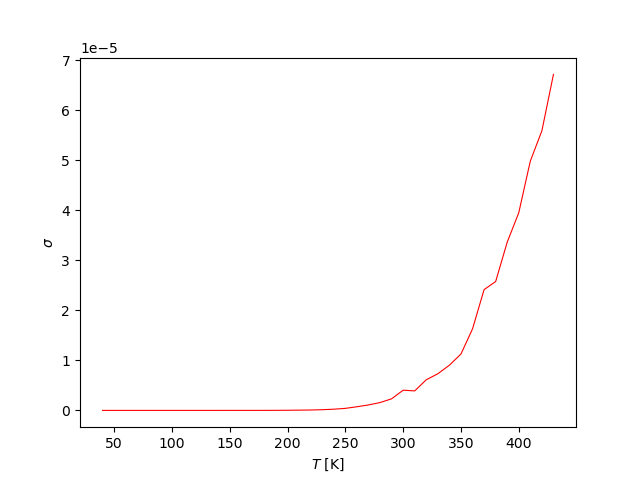

In [5]:
fig, ax  = plt.subplots()

ax.plot(temps,sigmas,'r-',lw=0.8)
ax.set_xlabel('$T$ [K]')
ax.set_ylabel('$\sigma$')
plt.show()

0D Mott VRH: slope = -2.685244562471351, r^2 = 0.998854825005899


/var/folders/gt/qhbvbx5d1hv7mm6w7y4738c40000gn/T/ipykernel_59166/3403524522.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


ValueError: x and y must have same first dimension, but have shapes (0,) and (40,)

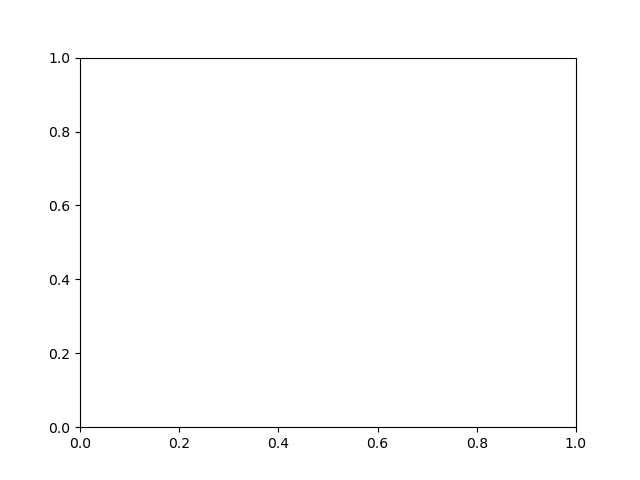

In [18]:
from scipy.stats import linregress

first_ind = 0

# Do Mott linear regression d = 0
slope, intercept, r, *_ = linregress(1000.0/(temps[first_ind:]), np.log(sigmas[first_ind:]))
print(f'0D Mott VRH: slope = {slope}, r^2 = {r**2}')
fig, ax = plt.subplots()
ax.plot((1000.0/(temps[:first_ind])),np.log(sigmas[first_ind:]),'ko',ms=2.0)
ax.plot((1000.0/(temps[:first_ind])), (1000.0/(temps[first_ind:]))*slope + intercept,'r-')
ax.set_xlabel("$1000/T$ [K$^{-1}$]")
ax.set_ylabel("$\log \sigma$")
#ax.set_yscale('log')
ax.set_title(f'Mott $d=0$ [$r^2 = $ {r**2}]')
plt.show()

# Do Mott linear regression d = 2
x = np.power(1.0/temps,3)[first_ind:]
slope, intercept, r, *_ = linregress(x, np.log(sigmas)[first_ind:])
print(f'2D Mott VRH: slope = {slope}, r^2 = {r**2}')
fig, ax = plt.subplots()
ax.plot(x,np.log(sigmas[first_ind:]),'ko',ms=2.0)
ax.plot(x,intercept + slope*x,'r-',lw=0.8)
ax.set_xlabel("$T^{-1/3}$ [K$^{-1/3}$]")
ax.set_ylabel("$\log \sigma$")
#ax.set_yscale('log')
ax.set_title(f'Mott $d=2$ [$r^2 = $ {r**2}]')
plt.show()

# Do RCH linear regression
x = np.log(temps)[first_ind:]
slope, intercept, r, *_ = linregress(x, np.log(sigmas)[first_ind:])
print(f'RCH: slope = {slope}, r^2 = {r**2}')
fig, ax = plt.subplots()
ax.plot(x,np.log(sigmas)[first_ind:],'ko',ms=2.0)
ax.plot(x,intercept + slope*x,'r-',lw=0.8)
ax.set_xlabel("$\log T$")
ax.set_ylabel("$\log \sigma$")
#ax.set_yscale('log')
ax.set_title(f'Rare chain hopping [$r^2 = $ {r**2}]')
plt.show()


In [7]:
np.max(temps)

430

In [8]:
def get_cluster_stats(run_inds,temps,datadir):
    nsamples = len(run_inds)
    ntemps = len(temps)
    avg_sizes = np.zeros((nsamples,ntemps),dtype=int)
    min_sizes = np.zeros((nsamples,ntemps),dtype=int)
    max_sizes = np.zeros((nsamples,ntemps),dtype=int)
    nclusters = np.zeros((nsamples,ntemps),dtype=int)
    for k in range(nsamples):
        #print(f"******* {run_inds[k]} *******")
        for l in range(ntemps):
            sampdir = f"sample-{run_inds[k]}"
            pkl = f"out_percolate-{temps[l]}K.pkl"
            fo = open(path.join(datadir,sampdir,pkl),'rb')
            dat = pickle.load(fo)
            clusters = dat[0]
            #print(f"T = {temps[l]}K: ",clusters)
            nclusters[k,l] = len(clusters)
            if len(clusters) == 0:
                sizes = 0
                print(run_inds[k], temps[l])
            else:
                sizes = np.array([len(c) for c in clusters])
            avg_sizes[k,l] = np.mean(sizes)
            min_sizes[k,l] = np.min(sizes)
            max_sizes[k,l] = np.max(sizes)
            fo.close()
            #print('\n')

    return nclusters, avg_sizes, min_sizes, max_sizes

nclusters, avgs, maxs, mins = get_cluster_stats(gr_inds,temps,datadir)

In [9]:
print('Only single clusters found: ', np.all(nclusters==1))

# There is only one cluster per sample at each temperature
sizes = avgs
avgs = np.mean(sizes,axis=0)
stds = np.std(sizes,axis=0)
print(np.min(sizes))



Only single clusters found:  True
20


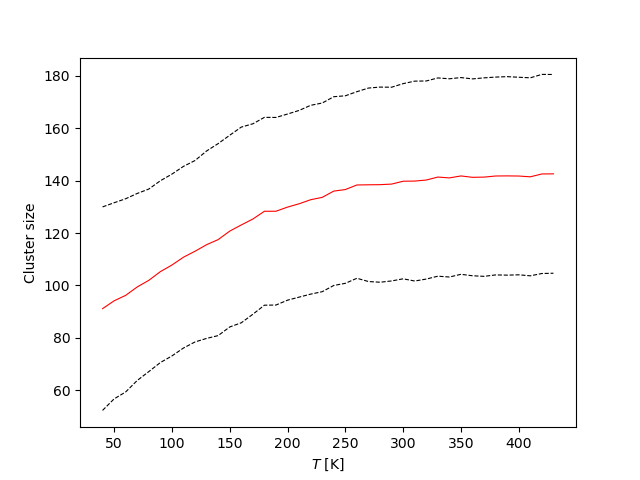

In [10]:
fig, ax = plt.subplots()
ax.plot(temps, avgs,'r-',lw=0.8)
ax.plot(temps, avgs + stds,'k--',lw=0.8)
ax.plot(temps, avgs - stds,'k--',lw=0.8)
ax.set_xlabel("$T$ [K]")
ax.set_ylabel("Cluster size")
plt.show()

400
[0, 12, 25]
0
[plt_utils.histogram] dx = 5.966666666666667
12
[plt_utils.histogram] dx = 5.566666666666666
25
[plt_utils.histogram] dx = 5.733333333333333


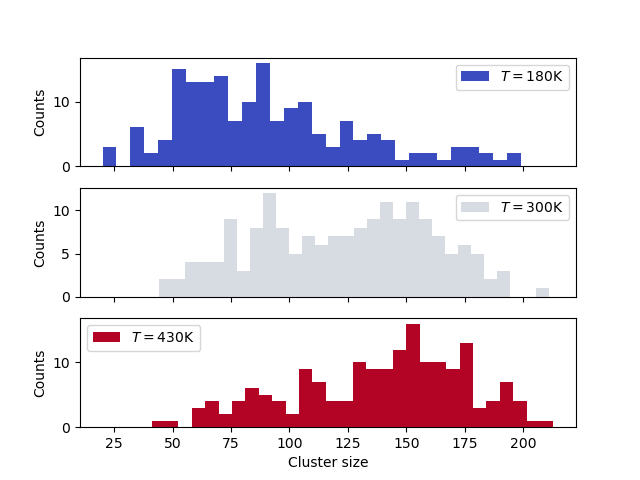

In [24]:
Tcm = plt_utils.get_cm(temps[14:],'coolwarm',max_val=1.0)
print(temps[36])

fig, axs = plt.subplots(3,1,sharex=True)

plot_inds = [0,12,25]
print(plot_inds)

for k,n in enumerate(plot_inds):
    print(n)
    plt_utils.histogram(sizes[:,n],nbins=30,show=False, normalised=False, plt_objs=(fig,axs[k]),
        plt_kwargs={'alpha': 1.0, 'color': Tcm[n], 'label': f'$T = {temps[14+n]}$K'})
    axs[k].legend()
axs[-1].set_xlabel('Cluster size')

plt.show()

In [12]:
from percolate import plot_cluster_brute_force, generate_site_list
from qcnico.coords_io import read_xsf

def get_data(run_ind,temp,datadir):
    #nsamples = len(run_inds)
    #ntemps = len(temps)
    sampdir = f"sample-{run_ind}"
    pkl = f"out_percolate-{temp}K.pkl"
    fo = open(path.join(datadir,sampdir,pkl),'rb')
    dat = pickle.load(fo)
    fo.close()
    return dat

posdir = path.join(path.dirname(datadir), 'structures')
Mdir = path.join(path.dirname(datadir), 'MOs_ARPACK')
edir = path.join(path.dirname(datadir), 'eARPACK')

tiny_cluster_inds = np.vstack((sizes == 2).nonzero())
print(tiny_cluster_inds)

gr_inds = np.array(gr_inds)

tiny_cluster_structures = gr_inds[np.unique(tiny_cluster_inds[0])]
#print(tiny_cluster_structures)

for nn in tiny_cluster_structures:
    T_ind = tiny_cluster_inds[1,(tiny_cluster_structures == nn).nonzero()[0][0]]
    print(T_ind)
    posfile = path.join(posdir,f'bigMAC-{nn}_relaxed.xsf')
    Mfile = path.join(Mdir,f'MOs_ARPACK_bigMAC-{nn}.npy')
    efile = path.join(edir, f'eARPACK_bigMAC-{nn}.npy')
    ccfile = path.join(datadir,'cc.npy')
    M = np.load(Mfile)
    centres = np.load(ccfile)
    energies = np.load(efile)
    T = temps[T_ind]
    dat = get_data(nn,T,datadir)
    c = dat[0][0]
    print(c)
    A = dat[2]
    pos, _ = read_xsf(posfile)
    centres, ee, MOinds = generate_site_list(pos, M, energies)
    plot_cluster_brute_force(c,pos,M,A,show_densities=True, dotsize=1.0, usetex=False, show=True, centers=centres, inds=MOinds,rel_center_size=10.0)

[]


In [13]:
print(np.where(sizes==0))


(array([], dtype=int64), array([], dtype=int64))


{65, 66, 71, 74, 77, 78, 79, 82, 83, 84, 85, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200}
[[390.2180298   89.87262815]
 [270.0263874  149.98921625]
 [149.834745   170.02807895]
 [ 29.6431026  109.91149085]
 [ 29.6431026  330.33898055]
 [189.8986258  350.37784325]
 [ 29.6431026  109.91149085]
 [ 49.675043   310.30011785]
 [390.2180298  350.37784325]
 [330.1222086  250.18352975]
 [149.834745    49.79490275]
 [ 29.6431026  330.33898055]
 [ 89.7389238  390.45556865]
 [249.994447   370.41670595]
 [29

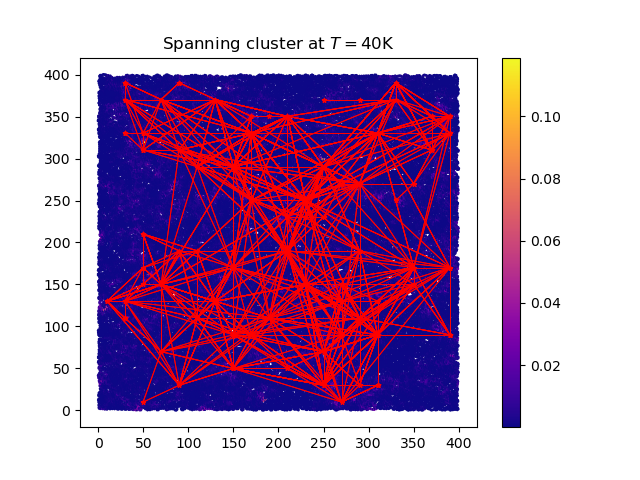

{2, 3, 4, 6, 7, 8, 9, 12, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 66, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200}
[[149.834745   149.98921625]
 [ 49.675043   170.02807895]
 [ 69.7069834  230.14466705]
 [310.0902682  250.18352975]
 [270.0263874   29.75604005]
 [209.9305662  230.14466705]
 [270.0263874  129.950353

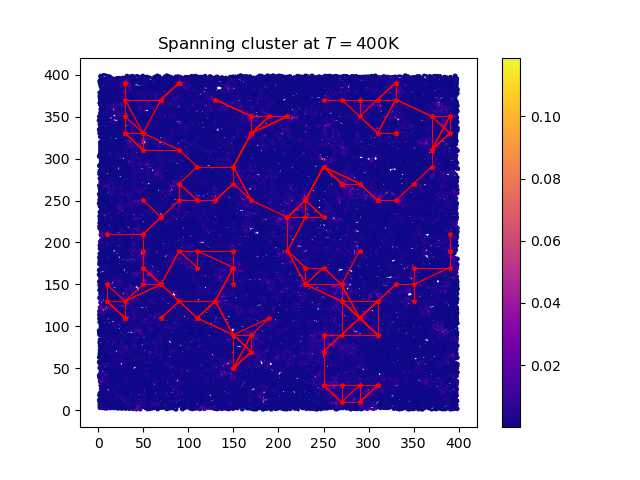

In [14]:
nn = 2
for T in [40,400]:
    posfile = path.join(posdir,f'bigMAC-{nn}_relaxed.xsf')
    Mfile = path.join(Mdir,f'MOs_ARPACK_bigMAC-{nn}.npy')
    efile = path.join(edir, f'eARPACK_bigMAC-{nn}.npy')
    ccfile = path.join(datadir,f'sample-{nn}','cc.npy')
    iifile = path.join(datadir,f'sample-{nn}','ii.npy')
    M = np.load(Mfile)
    centres = np.load(ccfile)
    MOinds = np.load(iifile)
    energies = np.load(efile)
    dat = get_data(nn,T,datadir)
    c = dat[0][0]
    print(c)
    A = dat[2]
    pos, _ = read_xsf(posfile)
    fig, ax = plt.subplots()
    plot_cluster_brute_force(c,pos,M,A,show_densities=True, dotsize=1.0, usetex=False, show=False, centers=centres, inds=MOinds,rel_center_size=10.0,plt_objs=(fig,ax))
    ax.set_title('Spanning cluster at $T = %d$K'%T)
    plt.show()

{65, 66, 71, 74, 77, 78, 79, 82, 83, 84, 85, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200}


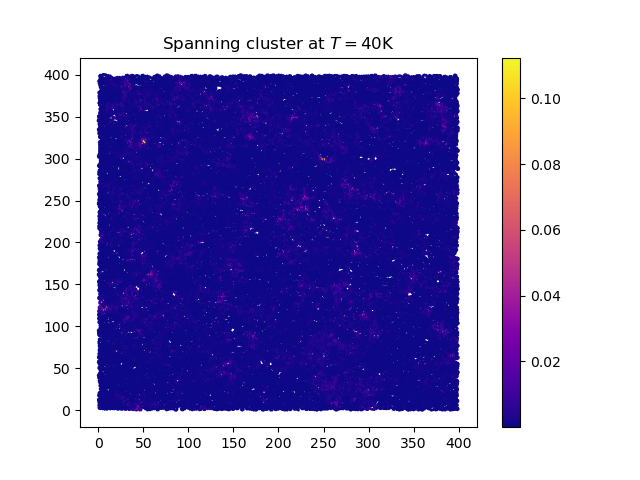

{2, 3, 4, 6, 7, 8, 9, 12, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 66, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200}


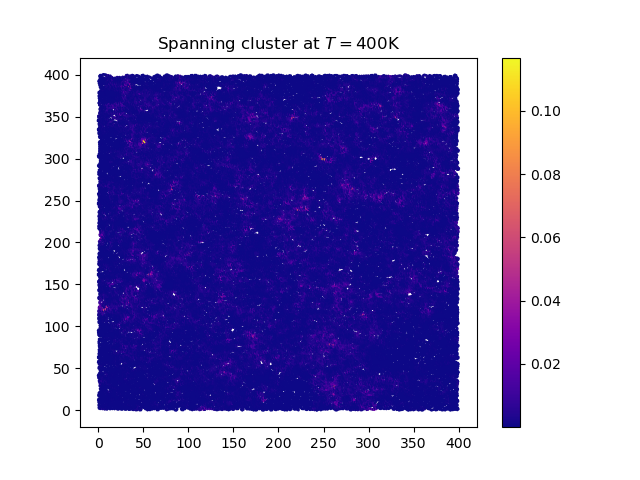

In [15]:
nn = 2
for T in [40,400]:
    posfile = path.join(posdir,f'bigMAC-{nn}_relaxed.xsf')
    Mfile = path.join(Mdir,f'MOs_ARPACK_bigMAC-{nn}.npy')
    ccfile = path.join(datadir,f'sample-{nn}','cc.npy')
    iifile = path.join(datadir,f'sample-{nn}','ii.npy')
    M = np.load(Mfile)
    centres = np.load(ccfile)
    MOinds = np.load(iifile)
    dat = get_data(nn,T,datadir)
    c = dat[0][0]
    print(c)
    pos, _ = read_xsf(posfile)
    rho = np.zeros(M.shape[0])
    
    c_inds = MOinds[list(c)]
    rho = np.sum(M[:,np.unique(c_inds)]**2,axis=1)


    fig, ax = plt.subplots()

    ye = ax.scatter(pos.T[0], pos.T[1], c=rho, s=1.0, cmap='plasma',zorder=1)
    cbar = fig.colorbar(ye,ax=ax,orientation='vertical')
    #ax.scatter(*centres[list(c)].T,c='r',marker='*',s=5.0)

    
    ax.set_title('Spanning cluster at $T = %d$K'%T)
    plt.show()
